## EDA - Exploratory Data Analysis and Data Visualization
         1. Clean the Data
         2. Analyze the Data
         3. Performing Data Visualisation to get insights from data

In [1]:
import pandas as pd

df = pd.read_csv("books.csv")
print(df.head())

                                   title   price availability  rating
0                   A Light in the Attic  £51.77     In stock       3
1                     Tipping the Velvet  £53.74     In stock       1
2                             Soumission  £50.10     In stock       1
3                          Sharp Objects  £47.82     In stock       4
4  Sapiens: A Brief History of Humankind  £54.23     In stock       5


## Cleaning the Raw Data

In [3]:
df = pd.read_csv("books.csv", encoding="utf-8")

df['price'] = df['price'].astype(str).replace({r'[^0-9.]': ''}, regex=True)
df['price'] = df['price'].astype(float)


df['availability'] = df['availability'].str.strip().str.replace(r'\s*\(.*\)', '', regex=True)

df.to_csv("books_cleaned.csv", index=False)

print(f"Cleaned data saved to books_cleaned.csv with {len(df)} records.")

Cleaned data saved to books_cleaned.csv with 1000 records.


In [5]:
df.head()

,title,price,availability,rating
0,A Light in the Attic,51.77,In stock,3
1,Tipping the Velvet,53.74,In stock,1
2,Soumission,50.10,In stock,1
3,Sharp Objects,47.82,In stock,4
4,Sapiens: A Brief History of Humankind,54.23,In stock,5


In [15]:
print(df.describe())

            price       rating
count  1000.00000  1000.000000
mean     35.07035     2.923000
std      14.44669     1.434967
min      10.00000     1.000000
25%      22.10750     2.000000
50%      35.98000     3.000000
75%      47.45750     4.000000
max      59.99000     5.000000


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   price         1000 non-null   float64
 2   availability  1000 non-null   object 
 3   rating        1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB
None


## Check number of books

In [7]:
num_books = df.shape[0]
print(f"Number of books: {num_books}")

Number of books: 1000


# Average Price

In [9]:
average_price = df['price'].mean()
print(f"Average price: £{average_price:.2f}")

Average price: £35.07


# Identifying any missing values

In [11]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
title           0
price           0
availability    0
rating          0
dtype: int64


In [13]:
# average rating from books
average_rating = df['rating'].mean()
print(f"Average rating: {average_rating:.2f}")

Average rating: 2.92


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

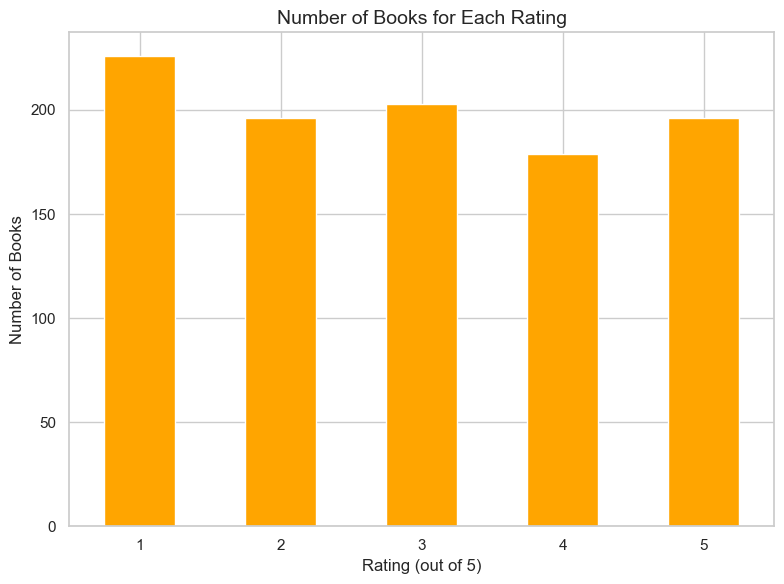

In [23]:
# Bar chart of the number of books for each rating
plt.figure(figsize=(8, 6)) 
rating_counts = df['rating'].value_counts().sort_index() 

# Creating a bar chart
rating_counts.plot(kind='bar', color='orange')

# Adding labels and title
plt.title("Number of Books for Each Rating", fontsize=14)
plt.xlabel("Rating (out of 5)", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)
plt.xticks(rotation=0) 

# Show the plot
plt.tight_layout()
plt.show()

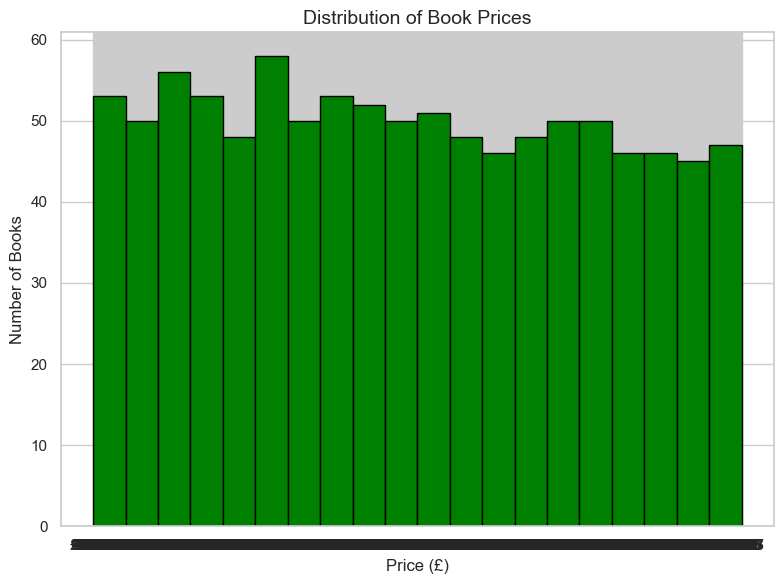

In [25]:
# Histogram showing the distribution of book prices.

plt.figure(figsize=(8, 6))  
plt.hist(df['price'], bins=20, color='green', edgecolor='black')

# Adding labels and title
plt.title("Distribution of Book Prices", fontsize=14)
plt.xlabel("Price (£)", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)
plt.tight_layout()
plt.show()

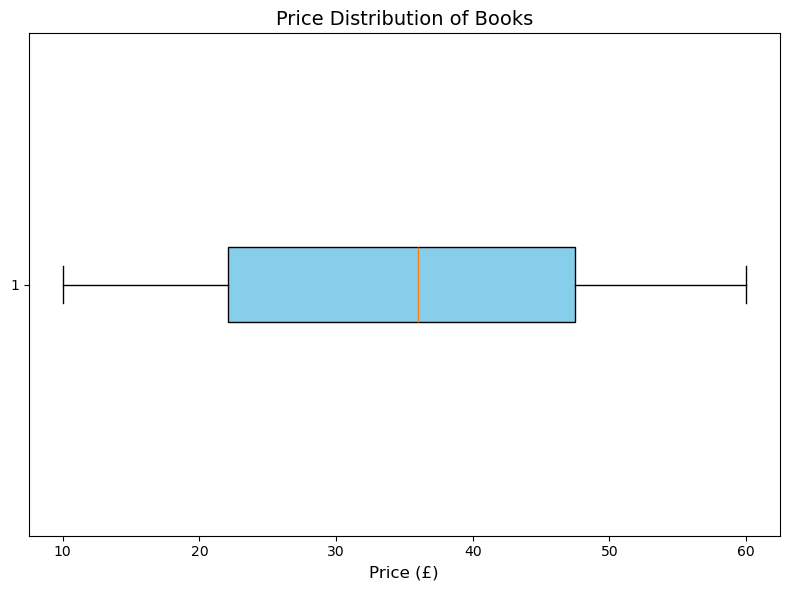

In [25]:
# Box plot to identify any outliers

plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))

# Adding labels and title
plt.title("Price Distribution of Books", fontsize=14)
plt.xlabel("Price (£)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

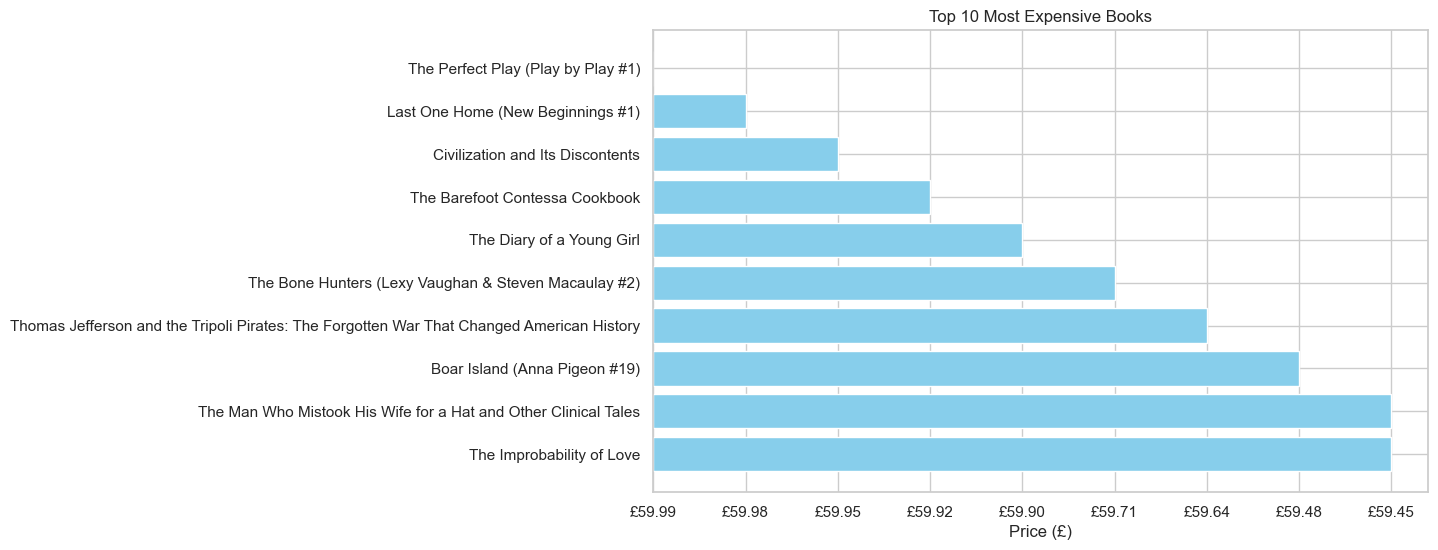

In [53]:
# Top 10 Most Expensive Books
top10 = df.sort_values('price', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10['title'], top10['price'], color='skyblue')
plt.xlabel('Price (£)')
plt.title('Top 10 Most Expensive Books')
plt.gca().invert_yaxis() 
plt.show()

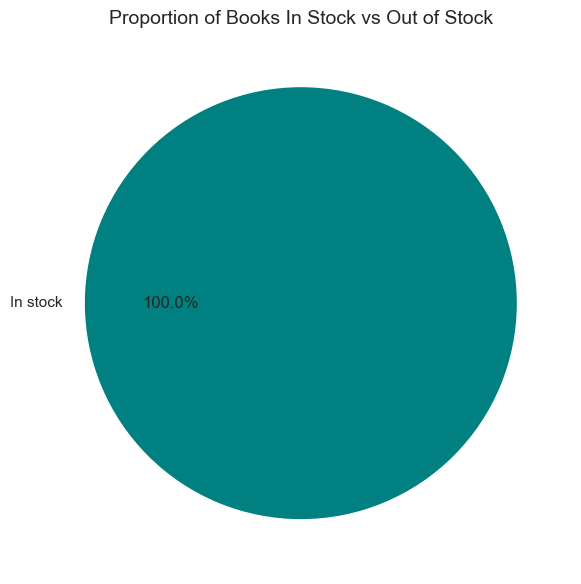

In [41]:
#Proportion of Books In Stock vs Out of Stock
availability_counts = df['availability'].value_counts()

# Making the pie chart
plt.figure(figsize=(8, 6)) 
plt.pie(availability_counts, labels=availability_counts.index, autopct='%1.1f%%', colors=['teal', 'red'])

plt.title("Proportion of Books In Stock vs Out of Stock", fontsize=14)
plt.tight_layout() 
plt.show()